In [8]:
# Подгрузим пакеты
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

matplotlib.style.use("ggplot")
%matplotlib inline
import seaborn as sns

# %load_ext lab_black

In [6]:
pip install lab_black

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement lab_black (from versions: none)
ERROR: No matching distribution found for lab_black


<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



#  Дисперсионный анализ

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**.


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


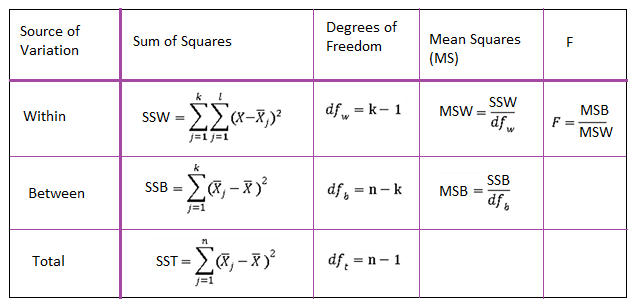

In [ ]:
from IPython.display import Image

Image("var_analysis.png")

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
внутригрупповая df: 2, межгрупповая df: 6
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.0


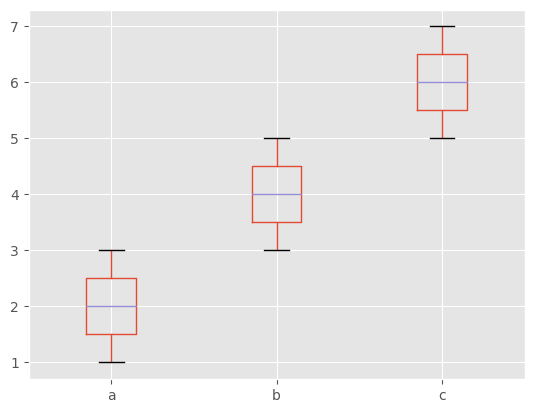

In [ ]:
# Выборки которые надо сравнить
data = pd.DataFrame({"a": [3, 1, 2], "b": [5, 3, 4], "c": [7, 6, 5]})
data.boxplot()
print("Нулевая гипотеза:", "=".join(data))
print("Альтернативная гипотеза:", f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean) ** 2 for val in data.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(
    data[group].size * (group_mean - grand_mean) ** 2
    for group, group_mean in data.mean().items()
)
# отклонения значений внутри группы от средней группы
ssw = sum(
    sum((x - group_mean) ** 2 for x in data[group])
    for group, group_mean in data.mean().items()
)

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат
mssb = ssb / dfb
# внутригрупповой средний квадрат
mssw = ssw / dfw

f_value = mssb / mssw

p = stats.f.sf(f_value, dfb, dfw)

print(f"внутригрупповая df: {dfb}, межгрупповая df: {dfw}")

print("Результат:")
if p < 0.05:
    print("отклоняем нулевую гипотезу")
else:
    print("НЕ отклоняем нулевую гипотезу")
print(f"Полученное f-значение {f_value}")

In [ ]:
data

,a,b,c
0,3,5,7
1,1,3,6
2,2,4,5


In [ ]:
# оформим код как функцию
def anova(data):
    """функция выводит на печать результаты дисперсионного анализа набора данных"""
    data.boxplot(figsize=(10, 6))
    print("Нулевая гипотеза:", "=".join(data))
    print("Альтернативная гипотеза:", f'!({"=".join(data)})')
    # общая средняя
    grand_mean = data.values.flatten().mean()
    # Общая сумма квадратов sst = ssb + ssw
    sst = sum((val - grand_mean) ** 2 for val in data.values.flatten())
    # отклонение групповых средний от общей средней
    ssb = sum(
        data[group].size * (group_mean - grand_mean) ** 2
        for group, group_mean in data.mean().items()
    )
    # отклонения значений внутри группы от средней группы
    ssw = sum(
        sum((x - group_mean) ** 2 for x in data[group])
        for group, group_mean in data.mean().items()
    )

    groups = data.shape[1]
    # Степени свободы
    dfb = groups - 1
    dfw = data.size - groups
    # межгрупповой средний квадрат
    mssb = ssb / dfb
    # внутригрупповой средний квадрат
    mssw = ssw / dfw

    f_value = mssb / mssw

    p = stats.f.sf(f_value, dfb, dfw)
    print(f"внутригрупповая df: {dfb}, межгрупповая df: {dfw}")
    print("Результат:")
    if p < 0.05:
        print("отклоняем нулевую гипотезу")
    else:
        print("НЕ отклоняем нулевую гипотезу")
    print(f"Полученное f-значение {f_value}")

## В ходе выполения заданий столкнулся с необходимостью обрабатывать данные, в которых присутствуют пустые значения. Доработал код из лекции, но не уверен, корректно ли? **Буду благодарен за экспетртное заключение**.

In [ ]:
# доработаем функцию таким образом, чтобы она корректно работала с наборами данных, в которых присутствует NaN
def anova_nan(data):
    """функция выводит на печать результаты дисперсионного анализа набора данных, в котром присутствуют пустые значения"""
    data.boxplot(figsize=(10, 6))
    print("Нулевая гипотеза:", "=".join(data))
    print("Альтернативная гипотеза:", f'!({"=".join(data)})')
    # общая средняя
    grand_mean = np.nanmean(data.values.flatten())
    # Общая сумма квадратов sst = ssb + ssw
    sst = sum(
        (val - grand_mean) ** 2
        for val in data.values.flatten()[~np.isnan(data.values.flatten())]
    )
    # отклонение групповых средний от общей средней
    ssb = sum(
        data[group].size * (group_mean - grand_mean) ** 2
        for group, group_mean in data.mean().items()
    )
    # отклонения значений внутри группы от средней группы
    ssw = sum(
        sum((x - group_mean) ** 2 for x in data[group].dropna())
        for group, group_mean in data.mean().items()
    )
    groups = data.shape[1]
    # Степени свободы
    dfb = groups - 1
    dfw = data.size - groups
    # межгрупповой средний квадрат
    mssb = ssb / dfb
    # внутригрупповой средний квадрат
    mssw = ssw / dfw

    f_value = mssb / mssw

    p = stats.f.sf(f_value, dfb, dfw)
    print(f"внутригрупповая df: {dfb}, межгрупповая df: {dfw}")
    print("Результат:")
    if p < 0.05:
        print("отклоняем нулевую гипотезу")
    else:
        print("НЕ отклоняем нулевую гипотезу")
    print(f"Полученное f-значение {f_value}")

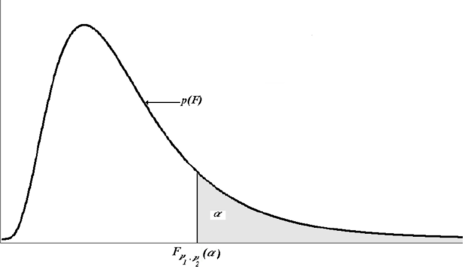

In [ ]:
# Распределение F-значения
Image("fisher_dist.png")

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/
![](https://drive.google.com/uc?export=view&id=1peJ6-vK_U2xgTdj3oTIdY7pIjK1jdihJ)

<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

In [ ]:
df = pd.DataFrame(
    [
        [25, 45, 30, 54],
        [30, 55, 29, 60],
        [28, 29, 33, 51],
        [36, 56, 37, 62],
        [29, 40, 27, 73],
    ],
    columns=["A", "B", "C", "D"],
)
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


### **Придуманый кейс**: вообразим (только вообразим!), что А, B, C и, наконец, D это некие злачные заведения (нашего города), а набор данных - возраст их пресыщенных жизнью посетителей.
![](https://drive.google.com/uc?export=view&id=1Vf74M_g5qQqygEL-zgiHklt5uniBe7DK)

Нулевая гипотеза: A=B=C=D
Альтернативная гипотеза: !(A=B=C=D)
внутригрупповая df: 3, межгрупповая df: 16
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 17.492810457516338


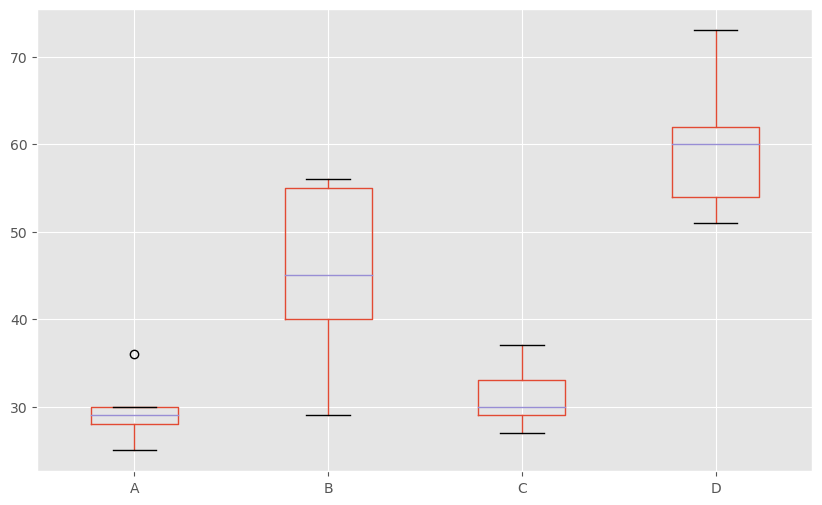

In [ ]:
anova(df)

### Видим, что различия в возрасте посетителей статистически значимы, а это означает, что некоторые, как минимум, злачные заведения имеют в своём репертуаре услуги, привлекательные лишь для определённых возрастных групп. Но - какие это заведенгия, сколько их?

In [ ]:
# преобразуем данные для удобства проведения теста Тьюки
res = pd.DataFrame()
for i in df.columns:
    df_c = pd.DataFrame(df[i]).rename({i: "res"}, axis=1)
    df_c["group"] = i
    res = res.append(df_c).reset_index(drop=True)
    df_c = pd.DataFrame()

In [ ]:
# проведём тест Тьюки при alpha=0.05
tukey = pairwise_tukeyhsd(endog=res["res"], groups=res["group"], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------


In [ ]:
# посмотрим основные статистики
df.describe()

,A,B,C,D
count,5.000000,5.000000,5.000000,5.000000
mean,29.600000,45.000000,31.200000,60.000000
std,4.037326,11.202678,3.898718,8.514693
min,25.000000,29.000000,27.000000,51.000000
25%,28.000000,40.000000,29.000000,54.000000
50%,29.000000,45.000000,30.000000,60.000000
75%,30.000000,55.000000,33.000000,62.000000
max,36.000000,56.000000,37.000000,73.000000


### Мы установили, что различия между возрастом посетителей злачных заведений А и С статистически не значимы, что нельзя сказать о всех других парах, которые могут быть сформированы из изучаемых злачных заведений.
### **Вывод**: если тебе меньше 45 лет, смело ступай в А или С, большой... точнее, статистически значимой, разницы нет. Но избегай B и D, там тебе будет скучно, проказник.

<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест:
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные.
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [ ]:
tillamook = [
    0.0571,
    0.0813,
    0.0831,
    0.0976,
    0.0817,
    0.0859,
    0.0735,
    0.0659,
    0.0923,
    0.0836,
]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [ ]:
# подготовим данные
df_mussel = pd.DataFrame()
column_name_list = ["tillamook", "newport", "petersburg", "magadan", "tvarminne"]
index_column_name = 0
len_max = max([len(x) for x in (tillamook, newport, petersburg, magadan, tvarminne)])
for lst in (tillamook, newport, petersburg, magadan, tvarminne):
    column_name = column_name_list[index_column_name]
    index_column_name += 1
    while len(lst) < len_max:
        lst = lst + [""]
    df_mussel[column_name] = lst
    df_mussel = df_mussel.replace("", np.nan)
df_mussel

,tillamook,newport,petersburg,magadan,tvarminne
0,0.0571,0.0873,0.0974,0.1033,0.0703
1,0.0813,0.0662,0.1352,0.0915,0.1026
2,0.0831,0.0672,0.0817,0.0781,0.0956
3,0.0976,0.0819,0.1016,0.0685,0.0973
4,0.0817,0.0749,0.0968,0.0677,0.1039
5,0.0859,0.0649,0.1064,0.0697,0.1045
6,0.0735,0.0835,0.1050,0.0764,NaN
7,0.0659,0.0725,NaN,0.0689,NaN
8,0.0923,NaN,NaN,NaN,NaN
9,0.0836,NaN,NaN,NaN,NaN


Нулевая гипотеза: tillamook=newport=petersburg=magadan=tvarminne
Альтернативная гипотеза: !(tillamook=newport=petersburg=magadan=tvarminne)
внутригрупповая df: 4, межгрупповая df: 45
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 13.093017860478282


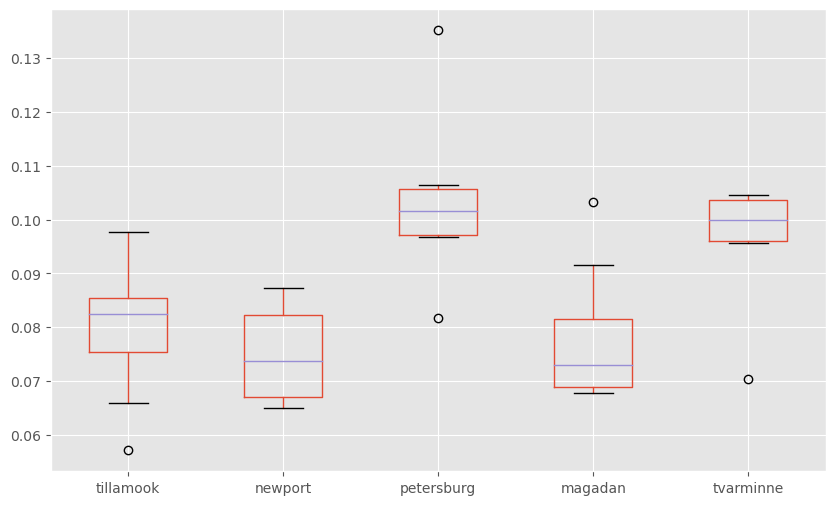

In [ ]:
anova_nan(df_mussel)

In [ ]:
# преобразуем данные для удобства проведения теста Тьюки
res = pd.DataFrame()
for i in df_mussel.columns:
    df_c = pd.DataFrame(df_mussel[i]).rename({i: "res"}, axis=1)
    df_c["group"] = i
    res = res.append(df_c).reset_index(drop=True)
    df_c = pd.DataFrame()
res.dropna(inplace=True)
res.reset_index(drop=True, inplace=True)

# проведём тест Тьюки при alpha=0.05
tukey = pairwise_tukeyhsd(endog=res["res"], groups=res["group"], alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   magadan    newport  -0.0032 0.9858 -0.0213  0.0149  False
   magadan petersburg   0.0254 0.0037  0.0067  0.0442   True
   magadan  tillamook   0.0022  0.996  -0.015  0.0194  False
   magadan  tvarminne   0.0177 0.0929 -0.0019  0.0373  False
   newport petersburg   0.0286 0.0009  0.0099  0.0474   True
   newport  tillamook   0.0054 0.8935 -0.0118  0.0226  False
   newport  tvarminne   0.0209 0.0317  0.0013  0.0405   True
petersburg  tillamook  -0.0232 0.0057 -0.0411 -0.0054   True
petersburg  tvarminne  -0.0077 0.8028 -0.0279  0.0124  False
 tillamook  tvarminne   0.0155 0.1447 -0.0032  0.0342  False
------------------------------------------------------------


### Видно, что мидии Магадана статистически другие, нежели мидии Петербурга; равно то же самое можно сказать о мидиях Ньюпорта и Петербурга, мидиях Ньюпорта и Твермина, мидиях Петербурга и Тидлламука. Магаданские мидии самые толерарантные, если так можно сказать.

# почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [ ]:
from numpy import random
from scipy.stats import t


def pair_t(samples, alpha):
    """Парный t-критерий, если все выборки равны, возвращает True"""
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание
    n_combinations = n_samples * (n_samples - 1) // 2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std() ** 2) / N + (samples[j].std() ** 2) / N)
            t_value = (samples[i].mean() + samples[j].mean()) / std_err
            p = t.sf(t_value, N - 2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    """
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    """
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)

    unique, counts = np.unique(result, return_counts=True)
    percentage = counts / result.size
    ax.pie(percentage, labels=unique, autopct="%.0f%%")

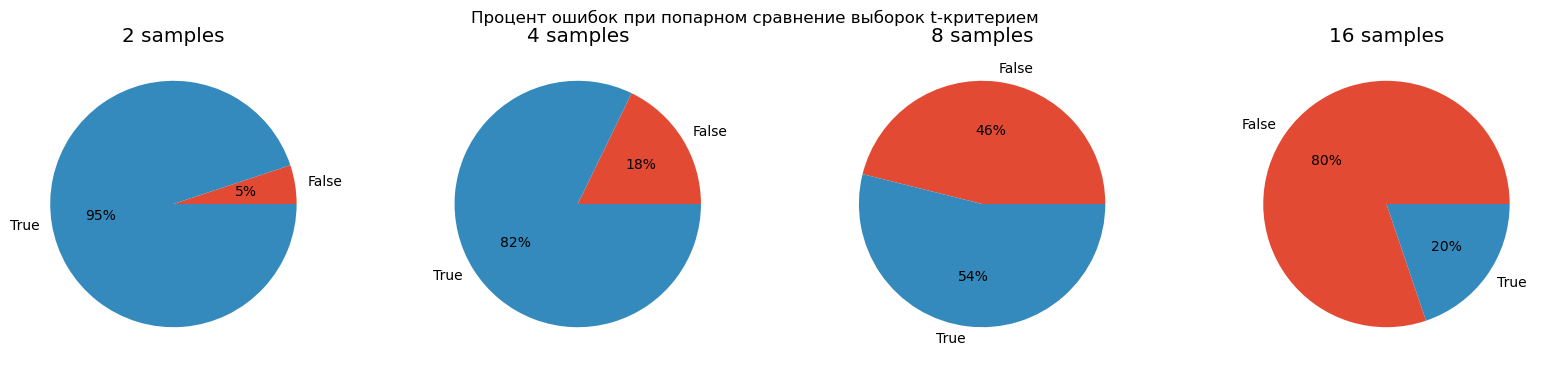

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle("Процент ошибок при попарном сравнение выборок t-критерием")

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 30, ax)
    ax.set_title(f"{n} samples")

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

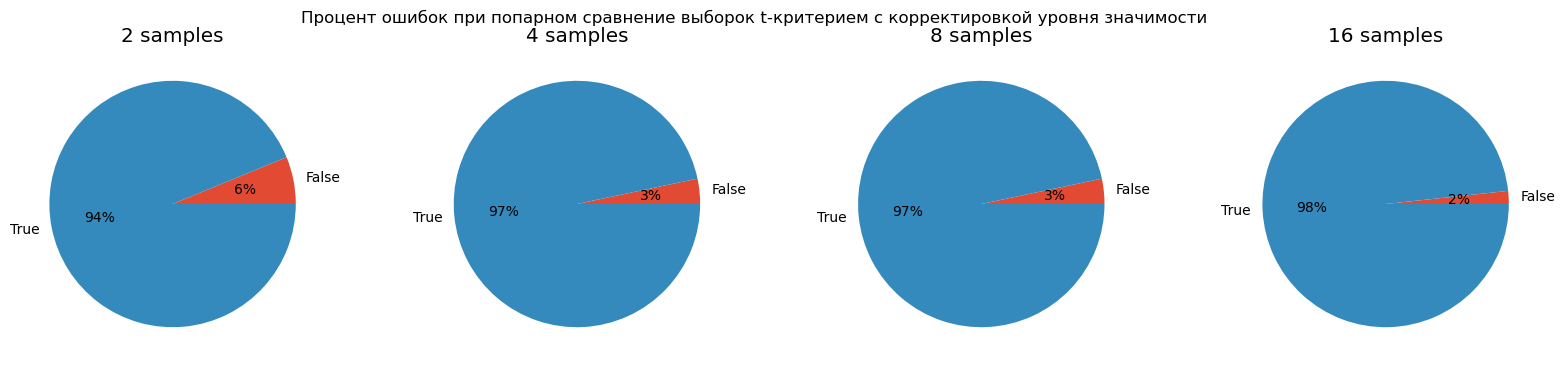

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle(
    "Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости"
)

for n, ax in zip(n_samples, axs):
    alpha = 0.05 / (
        (n * (n - 1)) / 2
    )  # делим на число сравнений = ((n*(n-1))/2) - поправка Бонферрони
    pair_t_test(1000, n, 30, ax, alpha)
    ax.set_title(f"{n} samples")

Однако в данном случае эта будет арх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.


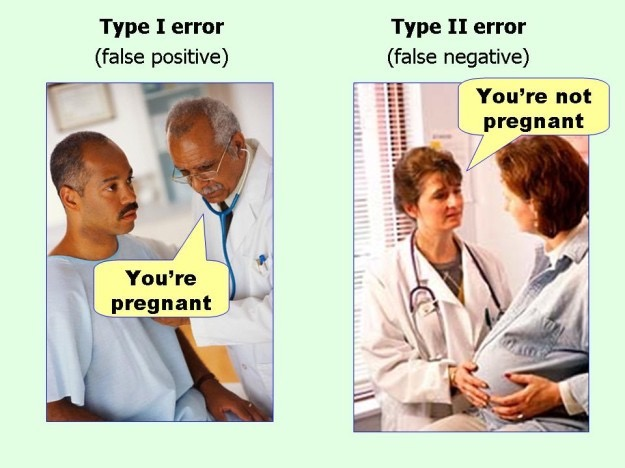

In [ ]:
Image("error_types.jpeg")

# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут)




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
df_ab = pd.DataFrame()
df_ab["A"] = A.tolist()
df_ab["B"] = B.tolist()

(array([ 3.,  2.,  4.,  3.,  4.,  9.,  7.,  6., 12.,  9.,  8.,  8.,  6.,
         5.,  6.,  2.,  2.,  1.,  1.,  2.]),
 array([-99.92486747, -86.55652   , -73.18817253, -59.81982505,
        -46.45147758, -33.08313011, -19.71478263,  -6.34643516,
          7.02191231,  20.39025979,  33.75860726,  47.12695473,
         60.4953022 ,  73.86364968,  87.23199715, 100.60034462,
        113.9686921 , 127.33703957, 140.70538704, 154.07373452,
        167.44208199]),
 <BarContainer object of 20 artists>)

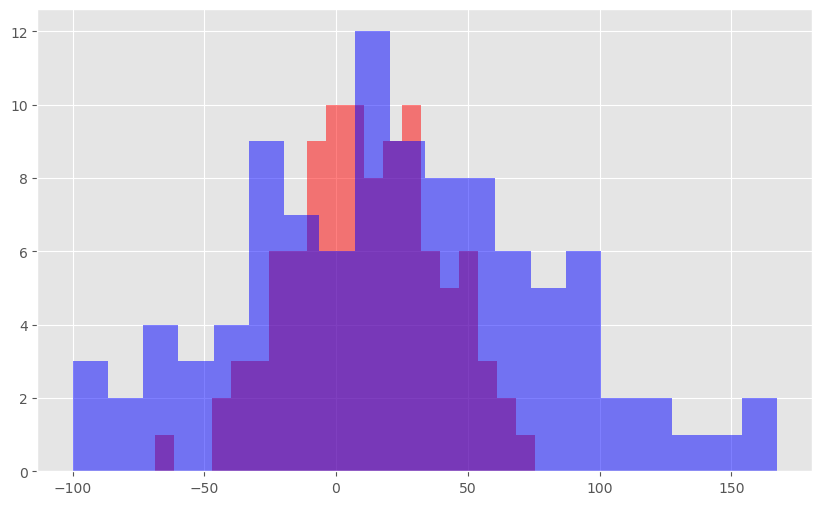

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(A, bins=20, alpha=0.5, color="r")
plt.hist(B, bins=20, alpha=0.5, color="b")

<AxesSubplot:>

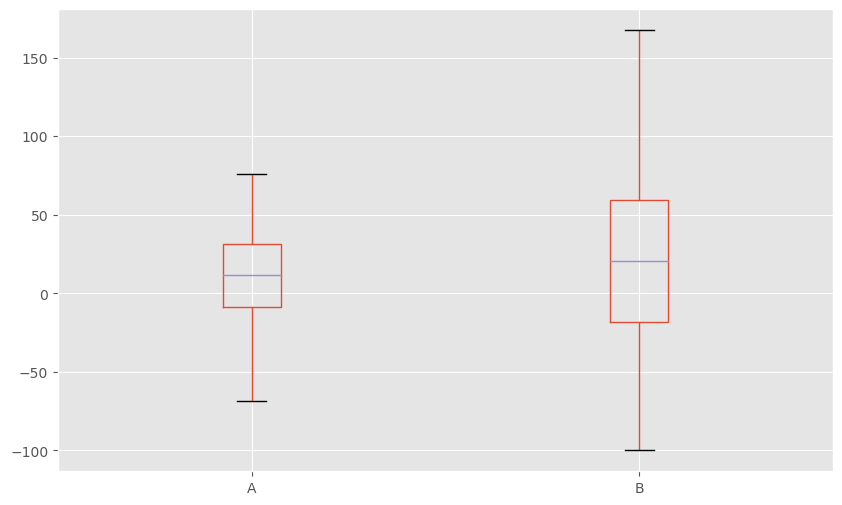

In [ ]:
df_ab.boxplot(figsize=(10, 6))

### Представлены две **независимые (по условию задания) выборки**, используем t-тест для двух независимых выборок. Уровень значимости традиционно 0.05

In [ ]:
stat, p = stats.ttest_ind(A, B)
print("Statistics=%.4f, p-value=%.4f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Отличия статистически незначимы")
else:
    print("Отличия статистически значимы")

Statistics=-1.7338, p-value=0.0845
Отличия статистически незначимы


<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`C` - группа людей без препарата.

`D` - та же группа людей, но получающая препарат
</div>

In [ ]:
np.random.seed(11)
C = stats.norm.rvs(scale=30, loc=11, size=100)
D = C + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.
df_cd = pd.DataFrame()
df_cd["C"] = C.tolist()
df_cd["D"] = D.tolist()

(array([ 3.,  2.,  4.,  3.,  4.,  9.,  7.,  6., 12.,  9.,  8.,  8.,  6.,
         5.,  6.,  2.,  2.,  1.,  1.,  2.]),
 array([-99.92486747, -86.55652   , -73.18817253, -59.81982505,
        -46.45147758, -33.08313011, -19.71478263,  -6.34643516,
          7.02191231,  20.39025979,  33.75860726,  47.12695473,
         60.4953022 ,  73.86364968,  87.23199715, 100.60034462,
        113.9686921 , 127.33703957, 140.70538704, 154.07373452,
        167.44208199]),
 <BarContainer object of 20 artists>)

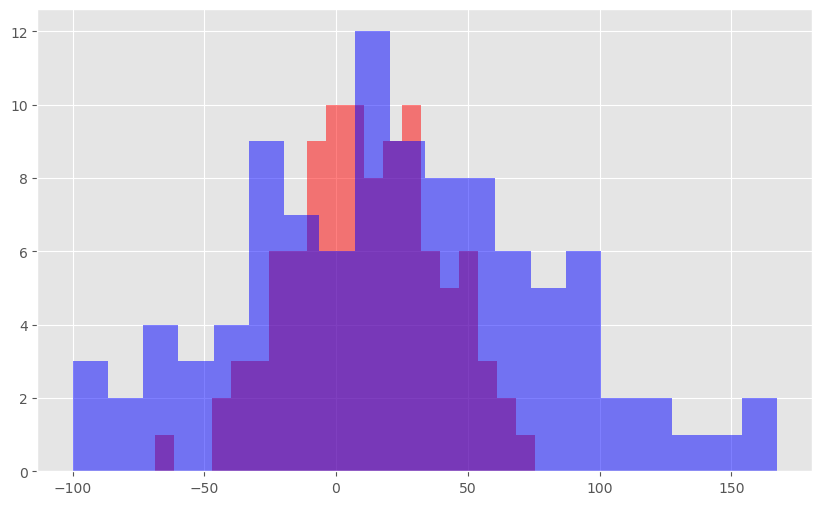

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(C, bins=20, alpha=0.5, color="r")
plt.hist(D, bins=20, alpha=0.5, color="b")

<AxesSubplot:>

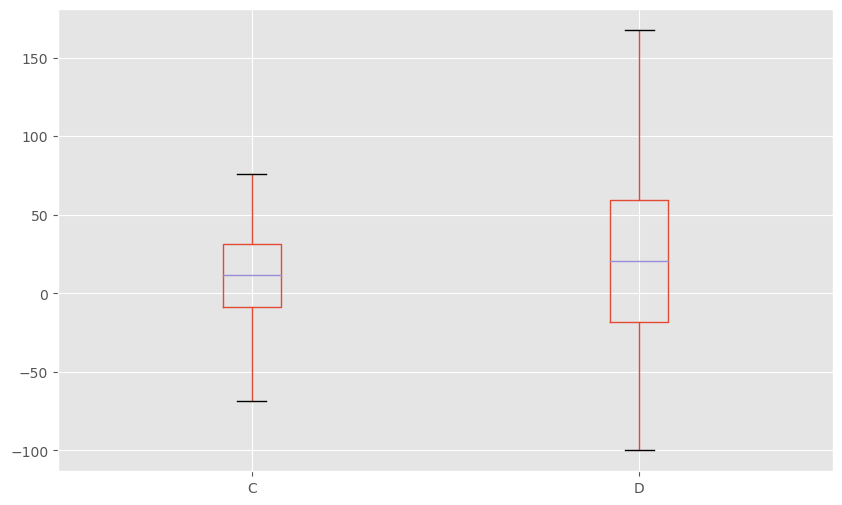

In [ ]:
df_cd.boxplot(figsize=(10, 6))

### Располагаем двумя **зависимыми выборками**, для исследования которых целесообразно применить t-критерий парной выборки. Примем значение уровня значимости 0.05

In [ ]:
stat, p = stats.ttest_rel(C, D)
print("Statistics=%.4f, p-value=%.4f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Отличия статистически незначимы")
else:
    print("Отличия статистически значимы")

Statistics=-2.1702, p-value=0.0324
Отличия статистически значимы


<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

# Ваш код.
# Преобразуем данные в датафрейм
data = pd.DataFrame(
    list(zip(water, nutri, mineral)), columns=["water", "nutri", "mineral"]
)

### Для проведения дисперсионного анализа воспользуемся имеющейся функцией anova()

Нулевая гипотеза: water=nutri=mineral
Альтернативная гипотеза: !(water=nutri=mineral)
внутригрупповая df: 2, межгрупповая df: 57
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 11.974276527331194


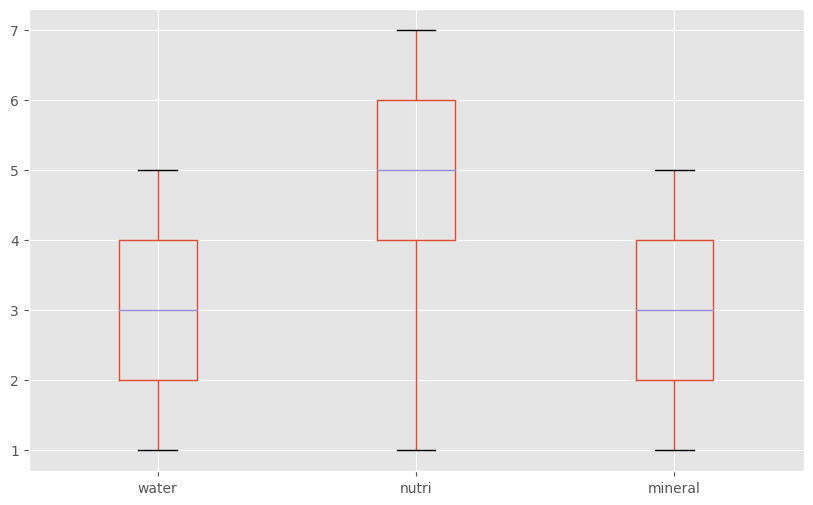

In [ ]:
anova(data)

### Судя по показателям размаха, результаты применения удобрений и есть те данные, которые приводят к отклонению Н0. Вода и минералка суть одно - вода.

### Теперь выполним парное сравнение результатов использования удобрений и минералки при помощи t-критерия для независимых выборок (alpha = 0.05)

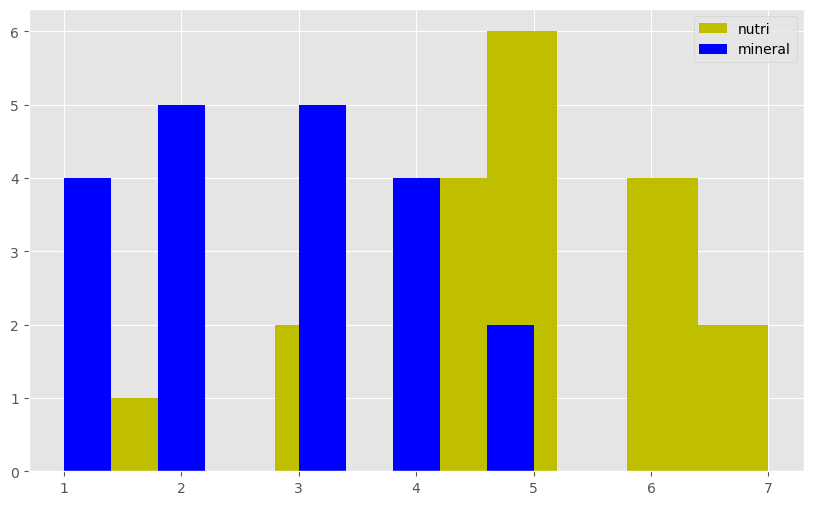

In [ ]:
# средние заметно не равны
plt.figure(figsize=(10, 6))
plt.hist(data["nutri"], bins=10, color="y")
plt.hist(data["mineral"], bins=10, color="b")
plt.legend(data[["nutri", "mineral"]])

In [ ]:
stat, p = stats.ttest_ind(nutri, mineral)
print("Statistics=%.4f, p-value=%.4f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Отличия статистически незначимы")
else:
    print("Отличия статистически значимы")

Statistics=4.2578, p-value=0.0001
Отличия статистически значимы


<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения.
    
Предлагаю самостоятельно исследовать данные и проверить гипотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему?



<AxesSubplot:title={'center':'weight'}, xlabel='group'>

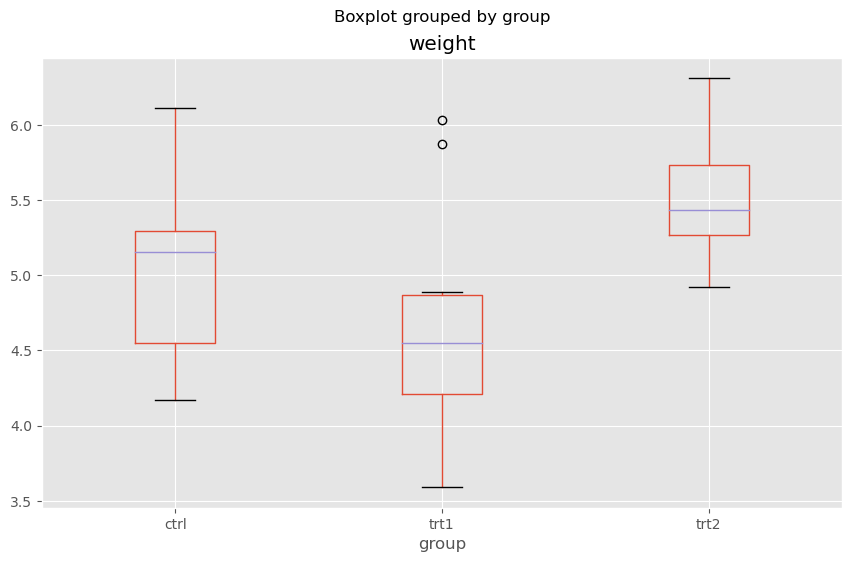

In [ ]:
data_new = pd.read_csv("PlantGrowth.csv", index_col=0)
data_new.boxplot("weight", by="group", figsize=(10, 6))

In [ ]:
data_new

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
...,...,...
26,5.29,trt2
27,4.92,trt2
28,6.15,trt2
29,5.80,trt2


### Три набора данных с различными средними и показателями размаха. Проведём дисперсионный анализ.

In [ ]:
# сформируем данные
df_data = pd.DataFrame()
for i in list(data_new.group.unique()):
    df = (
        pd.DataFrame(data_new[data_new.group == i].weight)
        .rename({"weight": i}, axis=1)
        .reset_index(drop=True)
    )
    df_data = pd.concat([df_data, df], axis=1)
df_data

,ctrl,trt1,trt2
0,4.17,4.81,6.31
1,5.58,4.17,5.12
2,5.18,4.41,5.54
3,6.11,3.59,5.50
4,4.50,5.87,5.37
5,4.61,3.83,5.29
6,5.17,6.03,4.92
7,4.53,4.89,6.15
8,5.33,4.32,5.80
9,5.14,4.69,5.26


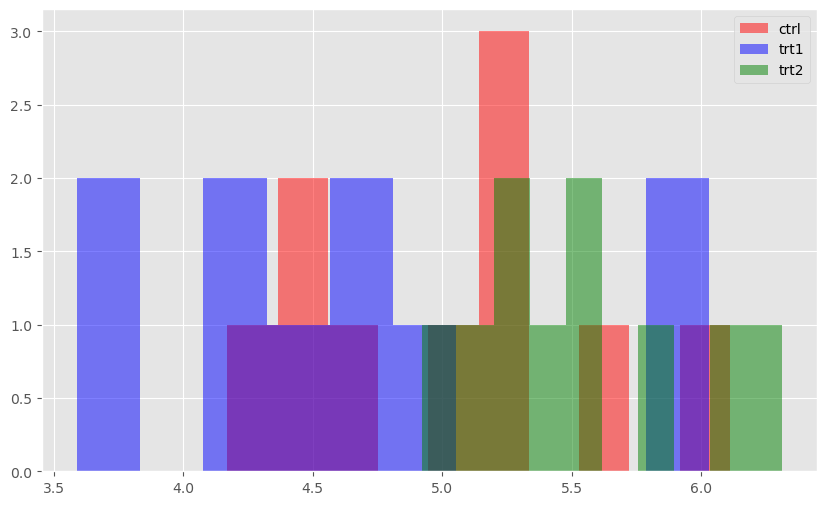

In [ ]:
# распределение данных
plt.figure(figsize=(10, 6))
bins = 10
alpha = 0.5
plt.hist(df_data["ctrl"], bins=bins, color="r", alpha=alpha)
plt.hist(df_data["trt1"], bins=bins, color="b", alpha=alpha)
plt.hist(df_data["trt2"], bins=bins, color="g", alpha=alpha)
plt.legend(df_data[["ctrl", "trt1", "trt2"]])

Нулевая гипотеза: ctrl=trt1=trt2
Альтернативная гипотеза: !(ctrl=trt1=trt2)
внутригрупповая df: 2, межгрупповая df: 27
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 4.846087862380138


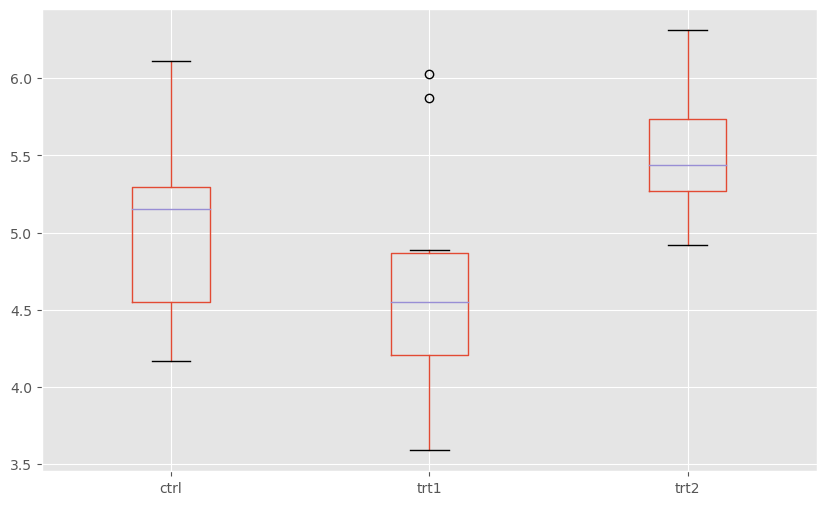

In [ ]:
# дисперсионный анализ
anova(df_data)

### Таким образом установлено, что между результатами применения удобрений имеются статистически значимые различия, но пока не понятно, чем именно они обусловлены.
### Для ответа на этот вопрос используем тест Тьюки

In [ ]:
tukey = pairwise_tukeyhsd(
    endog=data_new["weight"], groups=data_new["group"], alpha=0.05
)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


### Видно, что статистически значимая разница между результатами применения удобрений ctrl и trt1, ctrl и trt2 отсутствует, но присутствует статистически значимое различие между результатами применения удобрений trt1 и trt2. При этом наибольшее среднее значение урожайность принимает в случае использования удобрения trt2.
### Если предположить, что под ctrl понималось вообще не удобрять, то trt1 это нечто странное, превносящее в результат работы агронома скорее нотку непредсказуемости, а вот **для повышения урожайности лучше использовать trt2**.

# A/B - тесты
## Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>


<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

## **На вопросы в этом разделе я решил не отвечать и переходить сразу к покемонам.**

In [ ]:
data = pd.read_csv("cookie_cats.csv", on_bad_lines="warn")  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос.
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [ ]:
# Посмотрим на количество участников теста.
data.groupby("version").version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [ ]:
data.groupby("version").sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [ ]:
data.groupby("version").mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


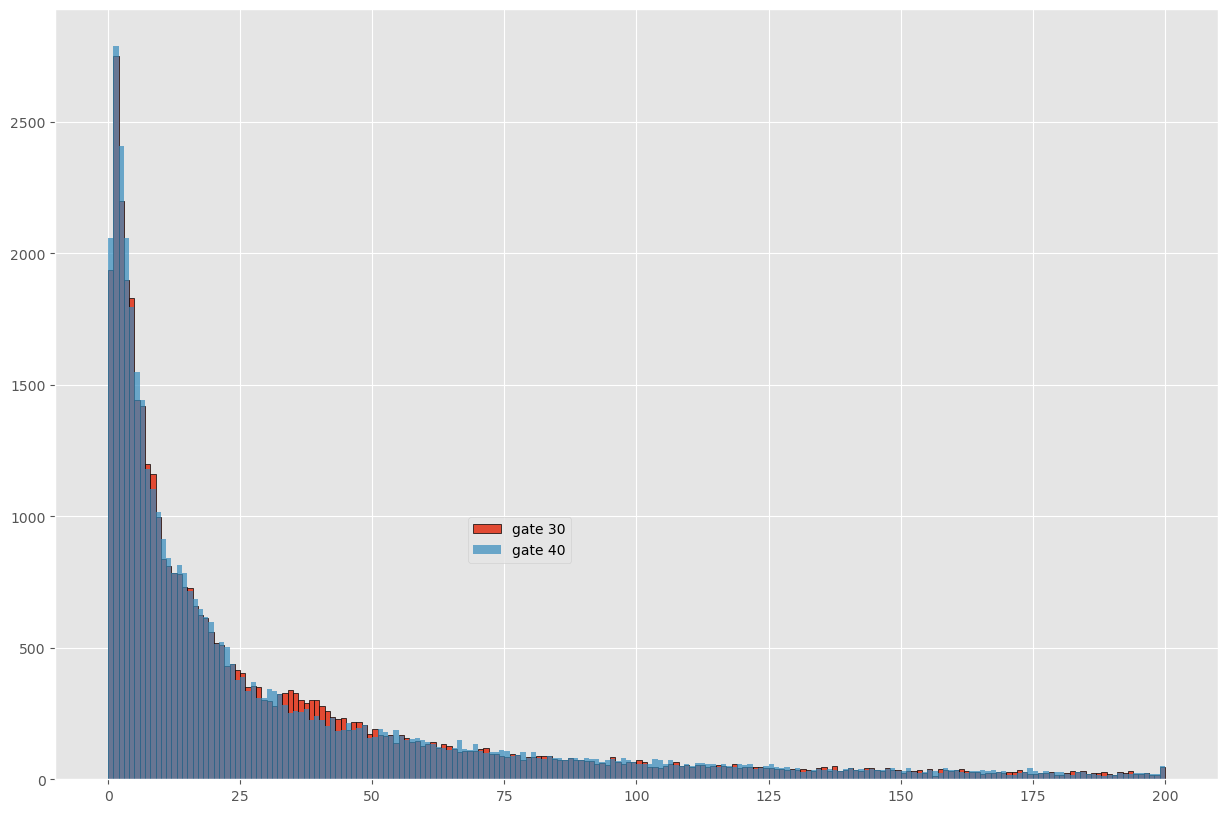

In [ ]:
v_30 = data.loc[data.version == "gate_30"]
v_40 = data.loc[data.version == "gate_40"]
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30["sum_gamerounds"], bins=bins, alpha=1, edgecolor="black", label="gate 30")
plt.hist(v_40["sum_gamerounds"], bins=bins, alpha=0.7, label="gate 40")
plt.legend(loc="upper right", bbox_to_anchor=(0.45, 0.35))
plt.show()

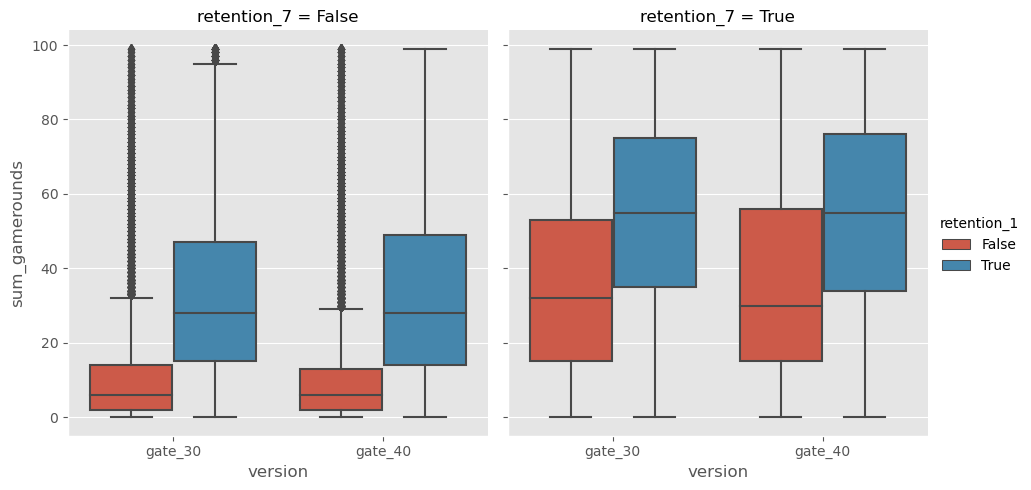

In [ ]:
df = data.loc[data["sum_gamerounds"] < 100].copy()


sns.catplot(
    x="version",
    y="sum_gamerounds",
    hue="retention_1",
    col="retention_7",
    data=df,
    kind="box",
    height=5,
    aspect=0.95,
)

In [ ]:
from scipy.stats import f_oneway

# from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.
f, p = f_oneway(
    data[data["version"] == "gate_30"]["sum_gamerounds"],
    data[data["version"] == "gate_40"]["sum_gamerounds"],
)
f, p
# stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
# print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

<AxesSubplot:ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

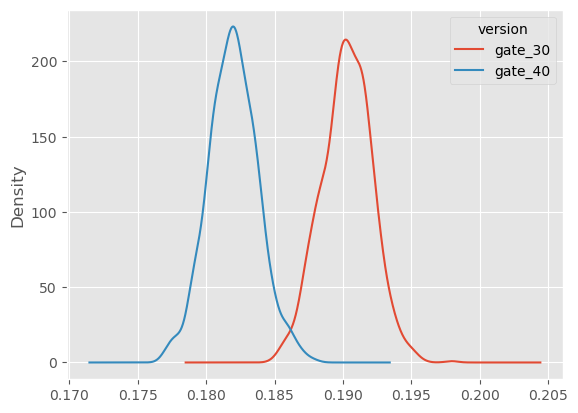

In [ ]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = (
        data.sample(frac=1, replace=True).groupby("version")["retention_7"].mean()
    )  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="density")

# Покемоны и AB-тестирование
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
pokemon = pd.read_csv(
    "pokemon.csv", on_bad_lines="warn"
)  # Откроем датасет. Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [ ]:
# подготовим необходмые функции


def filter_(row, params):
    """функция помогает фильтровать классы покемонов"""
    if row["Class 1"] in params and row["Class 2"] in params:
        return None
    elif row["Class 1"] in params:
        return row["Class 1"]
    elif row["Class 2"] in params:
        return row["Class 2"]
    else:
        return None


def filter_set(data, property_, params):
    """функция непосредственно осуществляет фильрацию класса покемонов"""
    data["class"] = data.apply(filter_, params=params, axis=1)
    data.dropna(subset=["class"], inplace=True)
    data.reset_index(drop=True, inplace=True)
    data = data[["pid", "Name", property_, "class"]]
    return data


def research(data, property_, params):
    """функция помогает провести статистическую оценку различий выбранной характеристики покемонов двух классов"""
    data.boxplot(property_, by="class", figsize=(10, 6))
    stat, p = stats.ttest_ind(
        data.loc[data["class"] == params[0]][property_],
        data.loc[data["class"] == params[1]][property_],
    )
    print("Statistics=%.4f, p-value=%.4f" % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Отличия статистически незначимы")
    else:
        print("Отличия статистически значимы")

In [ ]:
# создадим копию данных для экспериментов
data = pokemon.copy()
# подготовим данные для исследования по существу вопроса
property_ = "Attack"
params = ["Grass", "Rock"]
pok_task_1 = filter_set(data=data, property_=property_, params=params)
pok_task_1.head()

,pid,Name,Attack,class
0,1,Bulbasaur,49,Grass
1,2,Ivysaur,62,Grass
2,3,Venusaur,82,Grass
3,4,Mega Venusaur,100,Grass
4,49,Oddish,50,Grass


### Получили две независимые выборки, данные в которых подчиняются закону нормального распределения. Ничего другого не осатётся, как использовать t-критерий для двух независимых выборок при ставшем уже традиционным значении уровня значимости alpha=0.05.

Statistics=-3.7295, p-value=0.0003
Отличия статистически значимы


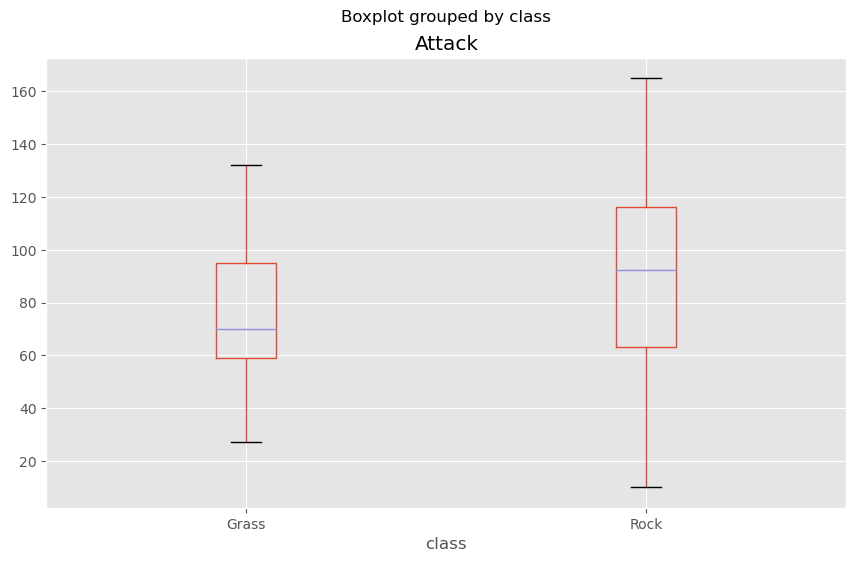

In [ ]:
research(data=pok_task_1, property_=property_, params=params)

![](https://drive.google.com/uc?export=view&id=1GTPXY7xnySixF88vp10DvJNeuPtAM11P)
### Да-да, вероятность получить такие или ещё более экстремальные отличия между силой обычной атаки покемонов классов `Grass` и `Rock` при условии, что эти различия отсутствуют (верна Н0), низка - ниже уровня значимости. Следовательно, Н0 должна быть отклонена и принята Н1 - отличия между силой обычной атаки между таковыми покемонами статистически значимы.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

### Честно говоря, я тоже, как этот ваш профессор Оук, долго не мог спать по ночам, пытаясь понять, чем эта задачи по существу отличается от предыдущей. И пришёл к выводу, что ничем. А раз так...

Statistics=-2.1509, p-value=0.0326
Отличия статистически значимы


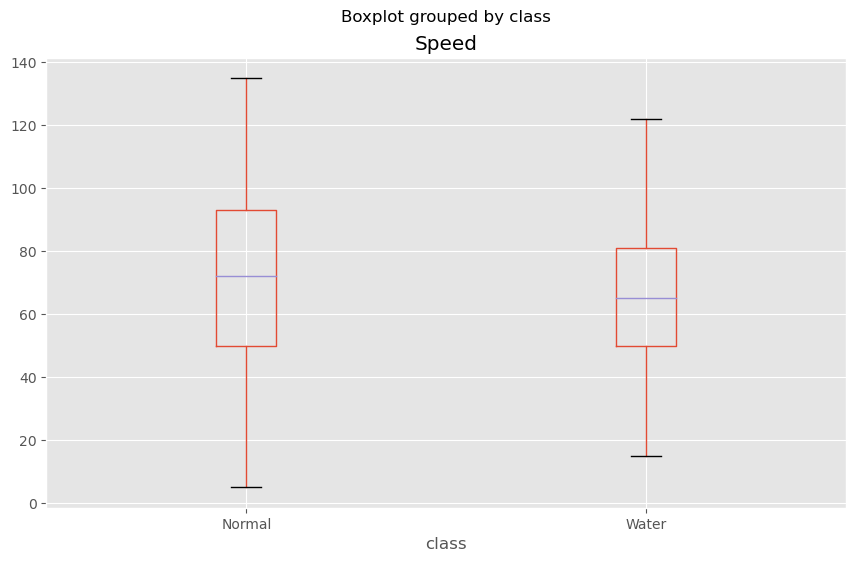

In [ ]:
# создадим копию данных для экспериментов
data = pokemon.copy()
# подготовим данные для исследования по существу вопроса
property_ = "Speed"
params = ["Water", "Normal"]
# сформируем данные
pok_task_2 = filter_set(data=data, property_=property_, params=params)
# дадим статистическую оценку
research(data=pok_task_2, property_=property_, params=params)

### Спи спокойно, профессор Оук, это снова правда.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
# treathed_pokemon = [
#     "Mega Beedrill",
#     "Mega Alakazam",
#     "Deoxys Normal Forme",
#     "Mega Lopunny",
# ]

### Для ответа на поставленный вопрос необходимо сопоставить скоростные характеристики несчастных подопытных покемонов (выборки) и скоростные характеристики всего зоопарка (генеральной совокупности). Но, обратите внимание: задание № 4 похоже на задание № 3 (и наоборот) так сильно, что аж захавтывает дух.
### Давайте узнаем, статистически ли значимо различие между формулировками задания № 3 и задания № 4? Это и будет очередное задание, **назовём его "Задание № 34"**.

<div class="alert alert-block alert-warning">
<b>Задание № 34:</b>
    
Сравните формулировки задания № 3 и задания № 4.

</div>

In [ ]:
tsk_3 = """Задание № 3: Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon.
Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически. Вы можете предположить,
что распределение скорости движения является нормальным для всех классов покемонов."""
tsk_4 = """Задание № 4: Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона.
Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon.
Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически. Вы можете предположить,
что распределение скорости движения является нормальным для всех классов покемонов."""

### Конечно, существует достаточно много подходов к сравнению строк. Но мы занимаемся статистикой, а это значит, что не станем их приенять. Пойдём другим путём, странным.
### Разделим тексты на слова (по пробелу) и применим подход, свойственный методу Манна-Уитни: объединим обе выборки в одну и проранжируем по возрастанию. А затем вновь разделим и сравним наборы рангов при помощи t-критерия для двух независимых выборок.

In [ ]:
df_tsk_3 = pd.DataFrame(tsk_3.split(), columns=["words"])
df_tsk_3["tsk"] = 3
df_tsk_4 = pd.DataFrame(tsk_4.split(), columns=["words"])
df_tsk_4["tsk"] = 4
df_tsk = pd.concat((df_tsk_3, df_tsk_4), axis=0)
df_tsk["words_rank"] = df_tsk["words"].rank(ascending=1)
df_tsk

,words,tsk,words_rank
0,Задание,3,7.5
1,№,3,109.5
2,3:,3,1.0
3,Профессор,3,19.5
4,Оук,3,13.5
...,...,...,...
50,нормальным,4,61.5
51,для,4,41.5
52,всех,4,32.5
53,классов,4,51.5


<AxesSubplot:title={'center':'words_rank'}, xlabel='tsk'>

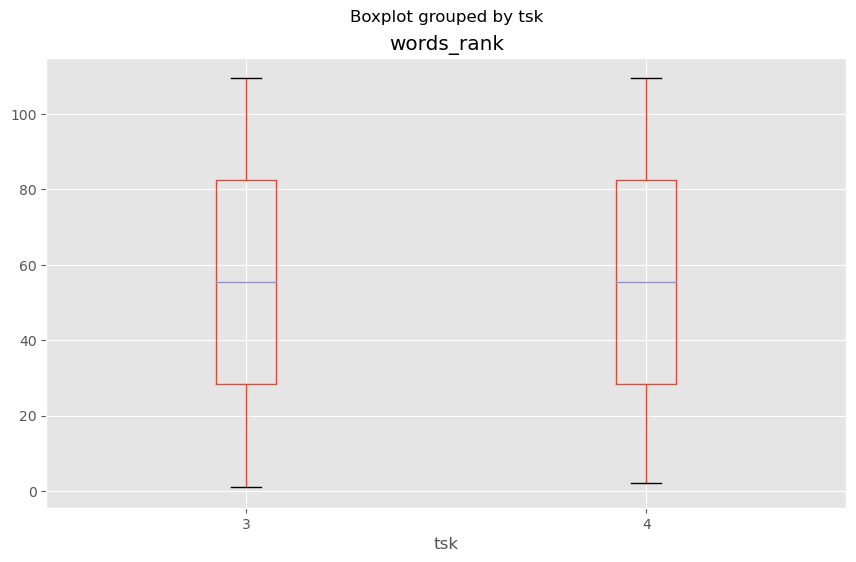

In [ ]:
df_tsk.boxplot("words_rank", by="tsk", figsize=(10, 6))

In [ ]:
stat, p = stats.ttest_ind(
    df_tsk.loc[df_tsk["tsk"] == 3]["words_rank"],
    df_tsk.loc[df_tsk["tsk"] == 4]["words_rank"],
)
print("Statistics=%.4f, p-value=%.4f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Отличия статистически незначимы")
else:
    print("Отличия статистически значимы")

Statistics=-0.0030, p-value=0.9976
Отличия статистически незначимы


### Очевидно, что безумец тут не профессор Оук. В частности, мы только что со статистикой в руках доказали, что задание 3 это, можно сказать, с вероятностью 0.9976 задание 4.
![](https://drive.google.com/uc?export=view&id=17iSKqohm_LTq1c9_-R3LPee-wzUFopHu)
### Переходим к заданию 5.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
# подготовим данные
df_task_5 = pokemon.copy()
df_task_5["char_sum"] = df_task_5["HP"] + df_task_5["Attack"] + df_task_5["Defense"]
df_task_5["char_mlt"] = df_task_5["HP"] * df_task_5["Attack"] * df_task_5["Defense"]

In [ ]:
df_task_5

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,char_sum,char_mlt
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


#### Визуализируем разброс

<AxesSubplot:title={'center':'char_sum'}, xlabel='Legendary'>

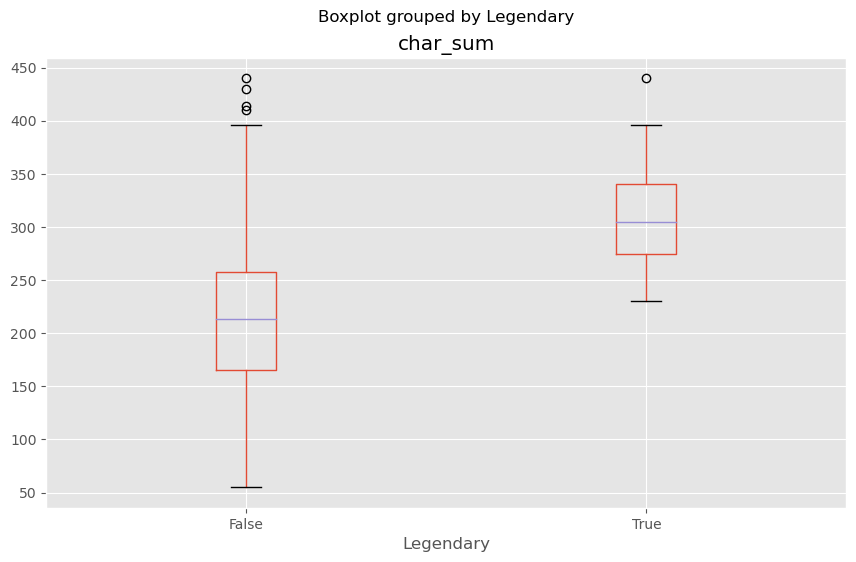

In [ ]:
df_task_5.boxplot("char_sum", by="Legendary", figsize=(10, 6))

<AxesSubplot:title={'center':'char_mlt'}, xlabel='Legendary'>

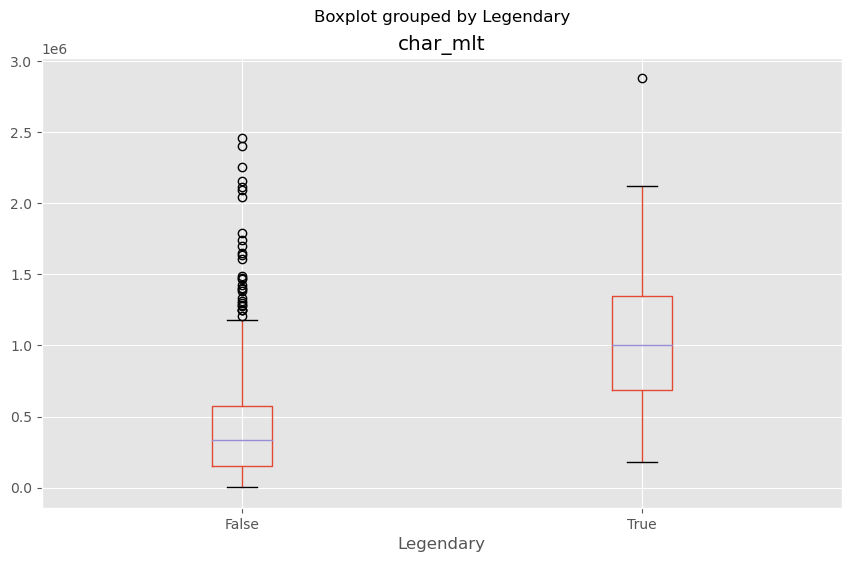

In [ ]:
df_task_5.boxplot("char_mlt", by="Legendary", figsize=(10, 6))

### Проведём статистический анализ синтетических критериев покемоньей могучести, сравнив характеристики легендарных покемнов (выборки) и вообще всех покемонов (генеральной совокупности).
![](https://drive.google.com/uc?export=view&id=1Ut8bSAdiTYiBbuKsTgnbmIoi048aOy1Q)

In [ ]:
stat, p = stats.ttest_1samp(
    df_task_5[df_task_5["Legendary"] == True]["char_sum"],
    df_task_5["char_sum"].mean(),
)
print("Статистика=%.3f, p=%.6f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Отличия статистически незначимы")
else:
    print("Отличия статистически значимы")

Статистика=15.103, p=0.000000
Отличия статистически значимы


In [ ]:
stat, p = stats.ttest_1samp(
    df_task_5[df_task_5["Legendary"] == True]["char_mlt"],
    df_task_5["char_mlt"].mean(),
)
print("Статистика=%.3f, p=%.6f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("Отличия статистически незначимы")
else:
    print("Отличия статистически значимы")

Статистика=9.469, p=0.000000
Отличия статистически значимы


### Результаты показывают, что легендарные покемоны не зря легендарны. Профессор Оук немного неправ, так тоже иногда бывает.

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

#### Оставим на совести профессора Оука и уважаемых авторов этого задания такие мелочи, как черыре класса вместо трёх и отсутствие у одного параметра сумм и произведений. Проанализируем "силу обычной защиты" классов покемонов, указанных в best_defence_class, считая распределение нормальным.

In [ ]:
best_defence_class = ["Rock", "Ground", "Steel", "Ice"]
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
# подготовим данные
df_task_6 = pokemon.copy()
# выберем покемонов по классам и характеристике с использованием уже существующей функции
df_task_6 = filter_set(data=df_task_6, property_="Defense", params=best_defence_class)
df_task_6

,pid,Name,Defense,class
0,33,Sandshrew,85,Ground
1,34,Sandslash,110,Ground
2,37,Nidoqueen,87,Ground
3,40,Nidoking,77,Ground
4,56,Diglett,25,Ground
...,...,...,...,...
161,789,Bergmite,85,Ice
162,790,Avalugg,184,Ice
163,795,Zygarde Half Forme,121,Ground
164,796,Diancie,150,Rock


### Четыре набора данных, проведём дисперсионный анализ при alpha=0.05

Нулевая гипотеза: Ground=Ice=Rock=Steel
Альтернативная гипотеза: !(Ground=Ice=Rock=Steel)
внутригрупповая df: 3, межгрупповая df: 660
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 147.32192901477018


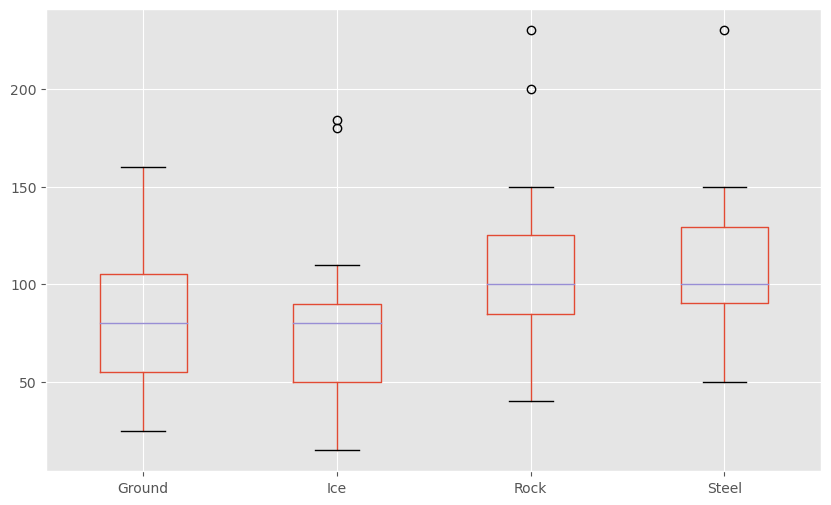

In [ ]:
# подготовим данные
df_task_6_anova = df_task_6.pivot(
    index="Name", columns="class", values="Defense"
).reset_index(drop=True)
# проведём дисперсионный анализ
anova_nan(df_task_6_anova)

In [ ]:
# воспользуемся тестом Тьюки
tukey = pairwise_tukeyhsd(
    endog=df_task_6["Defense"], groups=df_task_6["class"], alpha=0.05
)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Ground    Ice  -2.5618 0.9862 -22.0232 16.8997  False
Ground   Rock  23.0206 0.0071   4.7576 41.2836   True
Ground  Steel  28.2481 0.0006   9.8579 46.6383   True
   Ice   Rock  25.5824 0.0077   5.1325 46.0323   True
   Ice  Steel  30.8098 0.0008  10.2463 51.3734   True
  Rock  Steel   5.2274 0.8976 -14.2058 24.6607  False
-----------------------------------------------------


### Таким образом неоспоримо установлено: нет статистически значимых различий в силе обычной защиты покемонов лишь в паре классов Ground-Ice и Rock-Steel. Профессор Оук частично прав.

![](https://drive.google.com/uc?export=1g2CJESZO3-r66FALE1XKaoDZYXPeVV5t)